# Clustering `penguins` dataset with *K-means*

**Goal:** Given we know there are observations belonging to **3 different species** in the `penguins` dataset, use *K-means* to cluster these data points in their **original 4-dimensional space**, and visualize the cluster labeling in 2D scatter plots. Interpret the results, and take notes on **strange patterns** caused by the two-dimensional outputs, if there's any.

In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

RAND = 42

## Dataset

In [14]:
X_scaled = pd.read_csv("../datasets/penguins/simple/X_scaled.csv", index_col=0, header=0)
y = pd.read_csv("../datasets/penguins/simple/y.csv", index_col=0, header=0)

# Summary of the dataset

In [15]:
X_scaled.head()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
0,-0.884499,0.785449,-1.418347,-0.564142
1,-0.811126,0.126188,-1.062250,-0.501703
2,-0.664380,0.430462,-0.421277,-1.188532
3,-1.324737,1.089724,-0.563715,-0.938776
4,-0.847812,1.748985,-0.777373,-0.689020


In [16]:
X_scaled.describe()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
count,3.420000e+02,3.420000e+02,3.420000e+02,3.420000e+02
mean,1.662088e-16,4.155221e-16,-8.310441e-16,8.310441e-17
std,1.001465e+00,1.001465e+00,1.001465e+00,1.001465e+00
min,-2.168526e+00,-2.054446e+00,-2.059320e+00,-1.875362e+00
25%,-8.615697e-01,-7.866355e-01,-7.773731e-01,-8.138982e-01
50%,9.686524e-02,7.547549e-02,-2.788381e-01,-1.895079e-01
75%,8.397670e-01,7.854492e-01,8.606705e-01,6.846384e-01
max,2.875868e+00,2.205397e+00,2.142618e+00,2.620248e+00


In [17]:
rows, cols = X_scaled.shape
print(f"Dataset has {rows} rows and {cols} columns")

Dataset has 342 rows and 4 columns


In [18]:
X_scaled.columns

Index(['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g'], dtype='object')

## K-means model

In [19]:
from sklearn.cluster import KMeans

# first, create model
kmeans = KMeans(n_clusters=3, max_iter=1000, n_init='auto', random_state=RAND)

# then, fit the data
kmeans.fit(X_scaled)

# then, access assigned cluster labels
clustering_result = kmeans.labels_
clustering_ids = np.unique(clustering_result)

## Visualize the clustering in 2D

In [20]:
def visualize_kmeans_clustering(model:KMeans, X, f1='bill_length_mm', f2='bill_depth_mm', figsize=(6, 5)):
	_clustering_result = model.labels_
	_clustering_ids = np.unique(_clustering_result)

	plt.figure(figsize=figsize)
	cmap = plt.cm.tab10
	colors = cmap(_clustering_result)

	F1 = X.loc[:, f1]
	F2 = X.loc[:, f2]

	plt.scatter(F1, F2, s=40, color=colors, alpha=.75)
	plt.title(f"Features {f1} vs. {f2}")
	plt.xlabel(f1)
	plt.ylabel(f2)

	# legend
	handles = [
		plt.Line2D([], [], marker='o', linestyle='', label=f'Cluster {i}', color=cmap(i))
		for i in _clustering_ids
	]
	plt.legend(handles=handles, loc='center left', bbox_to_anchor=(1.02, 0.90))
	plt.gca().set_aspect("equal")
	plt.show()

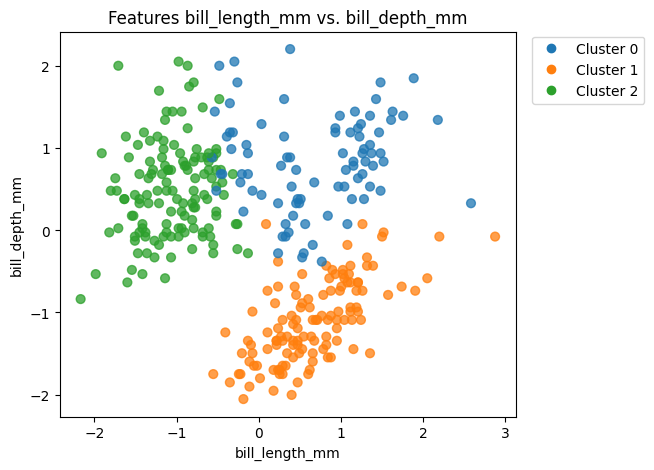

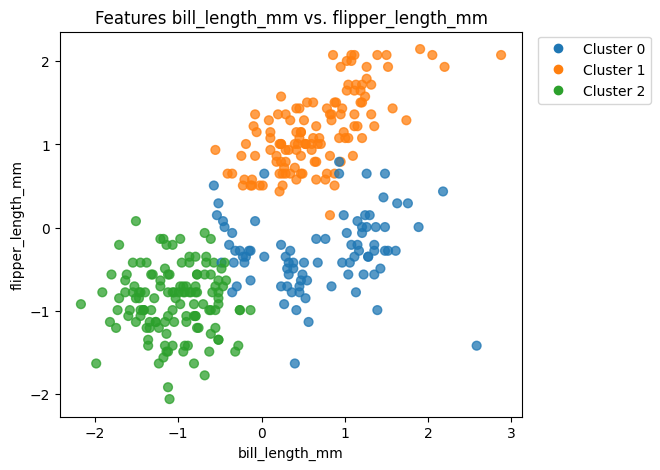

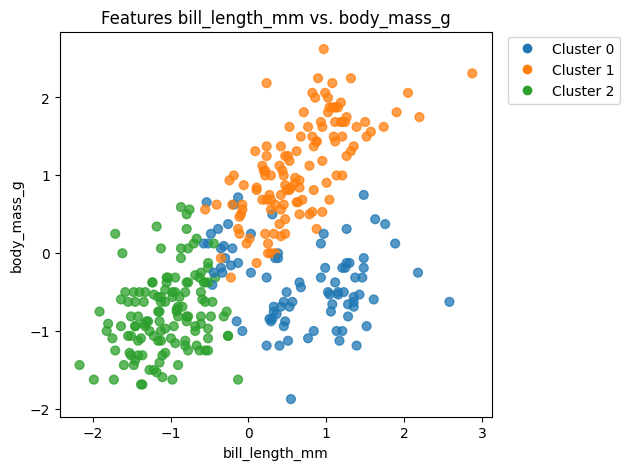

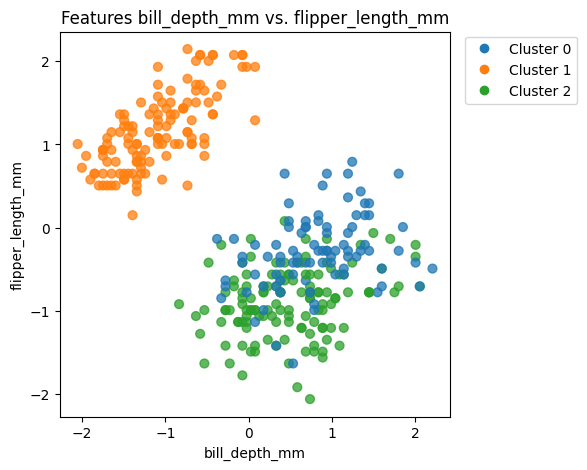

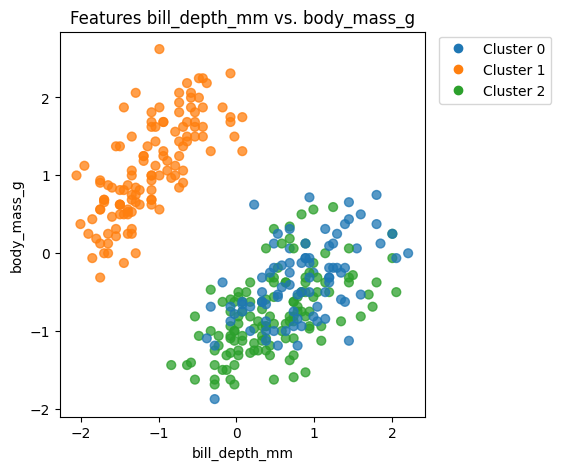

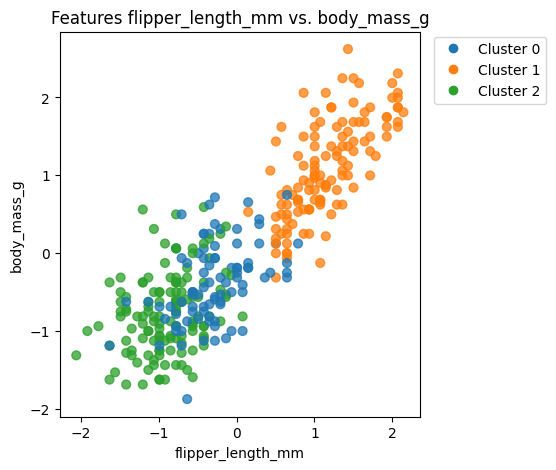

In [ ]:
# TODO: Observe the clustering result in (pairwise) 2D plots
# TODO: What do you observe?

visualize_kmeans_clustering(kmeans, X_scaled, f1='bill_length_mm', f2='bill_depth_mm')
visualize_kmeans_clustering(kmeans, X_scaled, f1='bill_length_mm', f2='flipper_length_mm')
visualize_kmeans_clustering(kmeans, X_scaled, f1='bill_length_mm', f2='body_mass_g')
visualize_kmeans_clustering(kmeans, X_scaled, f1='bill_depth_mm', f2='flipper_length_mm')
visualize_kmeans_clustering(kmeans, X_scaled, f1='bill_depth_mm', f2='body_mass_g')
visualize_kmeans_clustering(kmeans, X_scaled, f1='flipper_length_mm', f2='body_mass_g')

# Observations

## Different colours can mix together without a clear seperation due to many factors:
-   Real world data often doesn't support clean seperation. K-means assumes that clusters are konvex, roughly spherical and of the same size/density. If the real world data violates this, it cannot clearly seperate the data points.
-   We are projecting 4 dimensional data onto a 2D plane. This means that the visualizations are somewhat distorted. In full feature space the clusters may have no overlap, however in 2D they may.
-   Points near the edge of the centroid may appear mixed in a 2D scatter plot.

## From the scatter plots

- The orange cluster is more clearly seperable from the green and blue clusters, especially when viewing the body mass and bill depth attributes. If we run K-means with K = 2, we can see a much more clearer seperation in all the scatter plots.
- There are many elongated shapes on the scatter plots, which means that K-means doesn't fit very well for our data set, and is making arbitrary splits.
- 
